### The core aim of this project is to retrieve COVID-19 data from a designated website, specifically focusing on important metrics such as the number of affected cases, deaths, recoveries, and active cases within each state division in India. The data extraction process will involve utilizing web scraping methodologies to collect the desired information. We will be utilizing the website 'prsindia.org' as our primary source for this data retrieval task.

In [2]:
# Install all require library
!pip install requests
!pip install bs4

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=8e2d976348c262f44b01c6f47a5a5641938708c73a52dca04a3a9d8bbe706566
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [3]:
# Import all require library like request,os,panda,csv and beautiful.
import requests
import os
import pandas as pd
import csv
from bs4 import BeautifulSoup

In [4]:
# After import all the libraries we need to headers and save it variable.
headers={"User-Agent":"mozilla/5.0"}

# Now we need to save the url in a variable from where the data will download.
url='https://prsindia.org/covid-19/cases'

# Now use requests library to get the url with headers and convert into text and save in a variable.
rqd = requests.get(url,headers=headers).text

# Then use 'panda.read' to read the data in html.
df = pd.read_html(rqd)[0]

# Now save the data in to a variable after convert into a dataframe with the help of 'pd.DataFrame'.
cvd=pd.DataFrame(df)

# We used head() function to see the data first 10 rows.
cvd.head(10)

,#,State/UT,Confirmed Cases,Active Cases,Cured/Discharged,Death
0,1.0,Andaman and Nicobar Islands,10157,42,9986,129
1,2.0,Andhra Pradesh,2321379,755,2305893,14731
2,3.0,Arunachal Pradesh,64518,4,64218,296
3,4.0,Assam,724788,395,716405,7988
4,5.0,Bihar,832581,934,819388,12259
5,6.0,Chandigarh,93785,568,92052,1165
6,7.0,Chhattisgarh,1154179,861,1139282,14036
7,8.0,Dadra and Nagar Haveli and Daman and Diu,11474,14,11456,4
8,9.0,Delhi,1934009,4325,1903423,26261
9,10.0,Goa,248540,982,243720,3838


In [5]:
# To check how many rows and columns we have in the data.
cvd.shape

(37, 6)

In [6]:
# To check the data type and some more information about data
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   #                 36 non-null     float64
 1   State/UT          37 non-null     object 
 2   Confirmed Cases   37 non-null     int64  
 3   Active Cases      37 non-null     int64  
 4   Cured/Discharged  37 non-null     int64  
 5   Death             37 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.9+ KB


In [7]:
# To check the null value in data. We have found the null value in '#' column and we have to take care of it. As '#' this column is no use of it so we will remove it.
cvd.isna().sum()

#                   1
State/UT            0
Confirmed Cases     0
Active Cases        0
Cured/Discharged    0
Death               0
dtype: int64

In [8]:
# We need to remove the unwanted colum from the data.
cvd.drop(['#'],axis=1,inplace=True)

In [9]:
# We hve to rename the columns name as per requirement.
cvd = cvd.rename(columns={'State/UT':'State','Confirmed Cases':'Affected','Cured/Discharged':'Survived/Recover'})

In [10]:
# We have to remove the last row of this data which is not needed.
cvd.drop(index=cvd.index[-1],axis=0,inplace=True)

In [11]:
# Check the first five rows of the data.
cvd.head()

,State,Affected,Active Cases,Survived/Recover,Death
0,Andaman and Nicobar Islands,10157,42,9986,129
1,Andhra Pradesh,2321379,755,2305893,14731
2,Arunachal Pradesh,64518,4,64218,296
3,Assam,724788,395,716405,7988
4,Bihar,832581,934,819388,12259


In [12]:
# Check the last five rows of the data.
cvd.tail()

,State,Affected,Active Cases,Survived/Recover,Death
31,Telangana,800476,4421,791944,4111
32,Tripura,100901,7,99971,923
33,Uttar Pradesh,2090050,3541,2062971,23538
34,Uttarakhand,438663,787,430180,7696
35,West Bengal,2027901,5885,2000798,21218


In [13]:
# Export the data and save into a csv format.
cvd.to_csv ('Data_1.csv', index = False, header=True)

# **Analysis**

In [14]:
# We need to import matplotlib and seaborn library for vizualization the data.
import matplotlib.pyplot as plt
import seaborn as sns

# *Covid Affected People Analysis of each state in India*

Text(0.5, 1.0, 'Total affected people of each state')

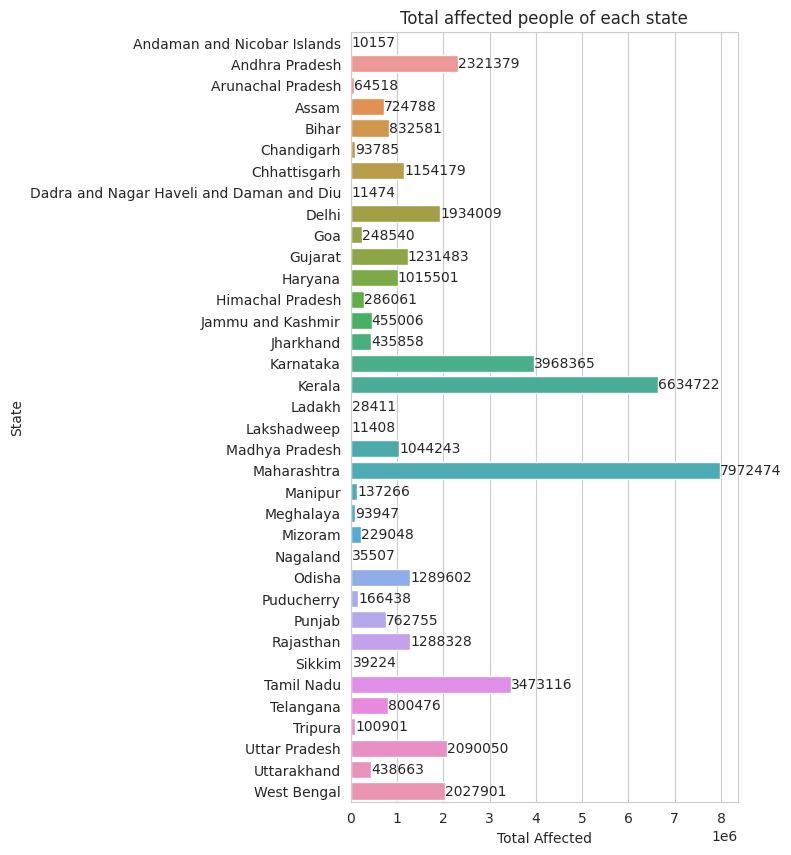

In [15]:
# This is the plot size configaration.
plt.figure(figsize=(5,10))

# Now we can use plot style but it's not mandatory.
sns.set_style("whitegrid")

# We used seaborn to making the diagram, Y axis is define 'state' and x axis is define 'Affected' columns and mention the data.
zx = sns.barplot(y = 'State', x = 'Affected', data = cvd)

# We created this forloop for mention the count on each bar.
for i in zx.containers:
  zx.bar_label(i, fmt='%.0f', label_type='edge')

plt.xlabel("Total Affected") # This is title of x axis.
plt.ylabel("State") # This is title of Y axis.
plt.title("Total affected people of each state") # This is Title of Diagram.


Here we create a diagram on the basis of affected people in covid in each state of India. And we can see the maximum people has been affected in Maharashtra and lowest people has been affected in Andaman and Nicobar islands.

# *Covid Active Cases Analysis of each state in India*

Text(0.5, 1.0, 'Total Active Cases of each state in India')

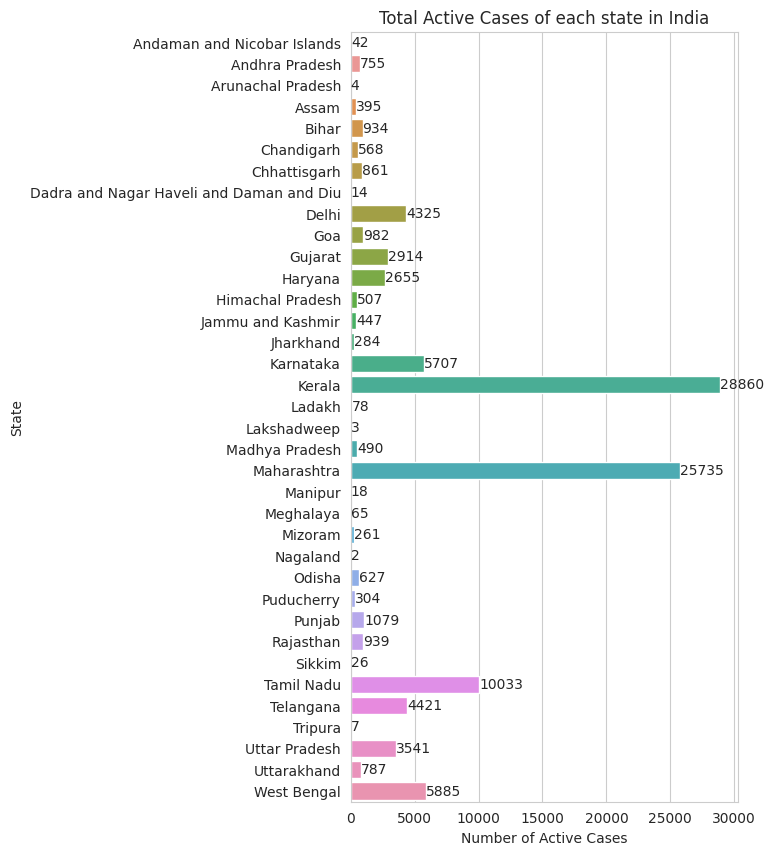

In [16]:
# This is the plot size configaration.
plt.figure(figsize=(5,10))

# Now we can use plot style but it's not needed every time.
sns.set_style("whitegrid")

# We used seaborn to making the diagram, Y axis is define 'state' and x axis is define 'Active Cases' columns and mention the data.
zx = sns.barplot(y = 'State', x = 'Active Cases', data = cvd)

# We created this forloop for mention the count on each bar.
for bars in zx.containers:
  zx.bar_label(bars, fmt='%.0f', label_type='edge')

plt.xlabel("Number of Active Cases") # This is label of x axis.
plt.ylabel("State") # This is label of Y axis.
plt.title("Total Active Cases of each state in India") # This is Title of Chart.


Here we create a diagram on the basis of Active cases in covid in each state of India. And we have found the maximum active cases in Kerala and lowest active cases in Nagaland.

# *Recovery Cases From Covid Analysis of each state in India*

Text(0.5, 1.0, 'Total number of Recovery case in each state')

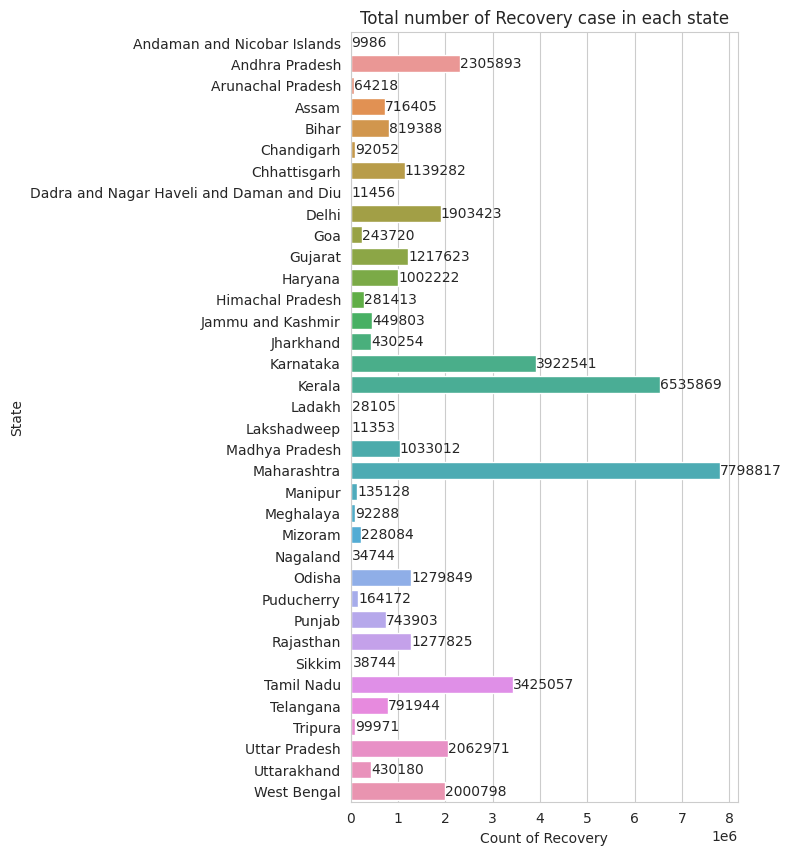

In [17]:
# This is the plot size configaration.
plt.figure(figsize=(5,10))

# Now we can use plot style but it's optional.
sns.set_style("whitegrid")

# We used seaborn to making the diagram, Y axis is define 'state' and x axis is define 'Survived/Recover' columns and mention the data.
zx = sns.barplot(y = 'State', x = 'Survived/Recover', data = cvd)

# We created this forloop for mention the count on each bar.
for bars in zx.containers:
  zx.bar_label(bars, fmt='%.0f', label_type='edge')

plt.xlabel("Count of Recovery") # Title of x axis.
plt.ylabel("State") # Title of y axis.
plt.title("Total number of Recovery case in each state") # Title of this Diagram.

We have created a chart on the basis of recovery cases in covid in each state of India. As per charts we can see the maximum people has been recovery from covid in state of Maharastra respectively affected case and lowest people has been recovery from covid in state of Andaman and Nicobar Islands respectively affected case.


# Compare with Survived and Affected Case

Text(0.5, 1.0, 'Compare With Survived and Affected Case')

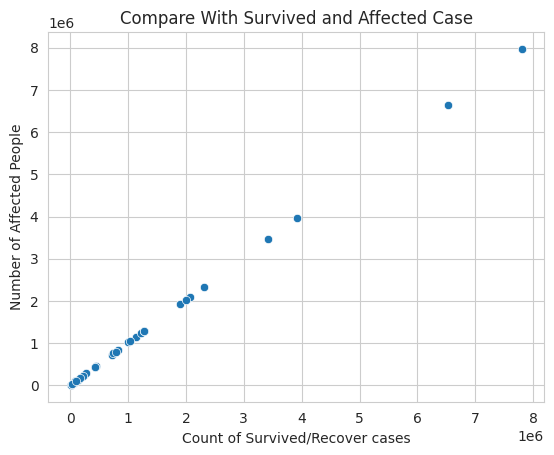

In [27]:
# We can use scatterplot for compare two numerical data.
sns.scatterplot(x= "Survived/Recover", y= "Affected", data = cvd)

plt.xlabel("Count of Survived/Recover cases") # Title of x axis.
plt.ylabel("Number of Affected People") # Title of y axis.
plt.title("Compare With Survived and Affected Case") # Title of this Diagram.

After compare with Survived and Affected case we can see the graph is linear regression it means that maximum people has been survived from covid in each state of India. It's true many people died in covid but if you look over all graph in each state 85% people survived.

# *Covid Death Analysis of each state in India*

Text(0.5, 1.0, 'Total number of Death case in each state')

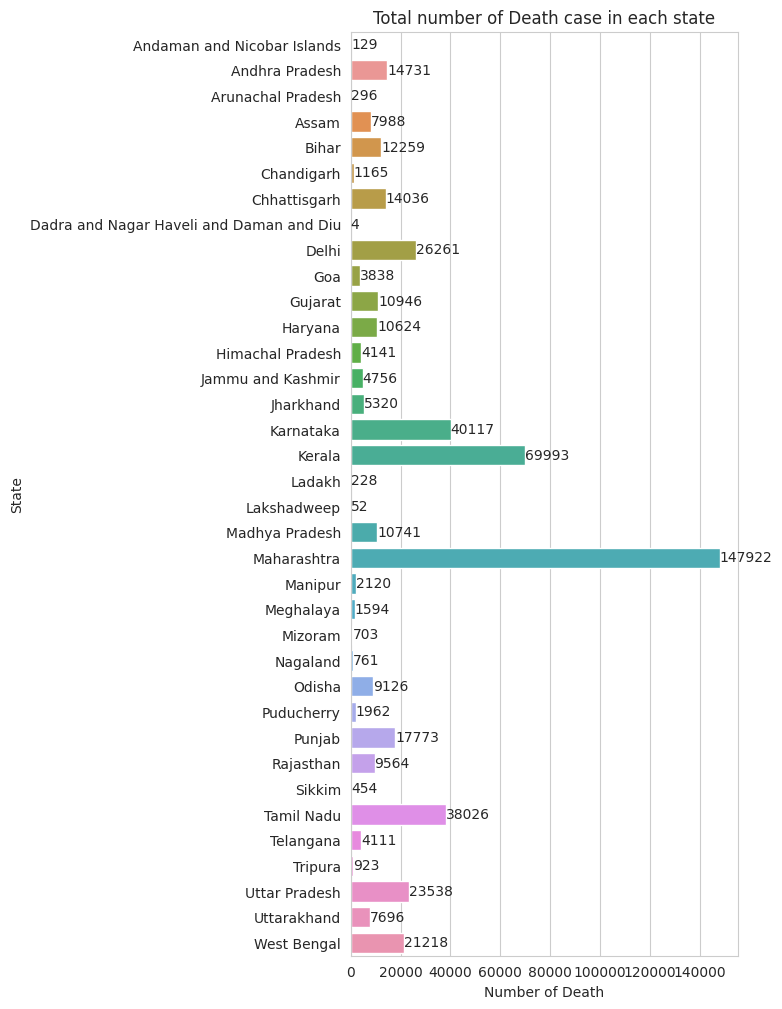

In [18]:
# This is the plot size configaration.
plt.figure(figsize=(5,12))

# Now we can use plot style but it's optional.
sns.set_style("whitegrid")

# We used seaborn to making the diagram, Y axis is define 'state' and x axis is define 'Death' columns and mention the data.
zx = sns.barplot(y = 'State', x = 'Death', data = cvd)

# We created this forloop for mention the count on each bar.
for bars in zx.containers:
  zx.bar_label(bars, fmt='%.0f', label_type='edge')

plt.xlabel("Number of Death") # Label of X axis.
plt.ylabel("State") # Label Of Y axis.
plt.title("Total number of Death case in each state") # Title of the Plot.

We have created a chart on the basis of death cases in covid of each state in India. As per charts we can see the maximum people died in covid in state of Maharastra and lowest people died in covid in state of Dadra and Nagar Haveli and Daman and Diu.
